# Importando libs



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# Obitos

In [2]:
fonte = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/obitos-registro-civil.csv'

In [65]:
df_obitos = pd.read_csv(fonte)#,dtype={'year':str,'month':str})
df_obitos.head()

,year,month,state,deaths
0,1970,1,AM,1
1,1970,1,BA,6
2,1970,1,CE,9
3,1970,1,DF,52
4,1970,1,ES,65


In [4]:
df_obitos.dtypes

year       int64
month      int64
state     object
deaths     int64
dtype: object

In [5]:
print(df_obitos.shape)
print(df_obitos.columns)

(15030, 4)
Index(['year', 'month', 'state', 'deaths'], dtype='object')


Estados

In [6]:
df_obitos['state'].unique()

array(['AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MS', 'MG', 'PB', 'PR',
       'PE', 'PI', 'RJ', 'RN', 'RS', 'SC', 'SP', 'SE', 'AL', 'AC', 'AP',
       'TO', 'PA', 'MT', 'RO', 'RR'], dtype=object)

In [7]:
df_obitos.describe()

,year,month,deaths
count,15030.000000,15030.000000,15030.000000
mean,1996.220825,6.477578,1827.888756
std,14.308252,3.447022,4067.561685
min,1970.000000,1.000000,1.000000
25%,1984.000000,3.000000,42.000000
50%,1997.000000,6.000000,253.500000
75%,2009.000000,9.000000,1305.750000
max,2020.000000,12.000000,34996.000000


# Situação Brasil (2020)

In [8]:
df_obitos_br = df_obitos.pivot_table(values='deaths',index=['year','month'],aggfunc='sum').reset_index()
df_obitos_br[df_obitos_br['year']==2020]

,year,month,deaths
600,2020,1,109238
601,2020,2,91860
602,2020,3,105059
603,2020,4,112863
604,2020,5,130470
605,2020,6,132361
606,2020,7,136728
607,2020,8,126535


In [9]:
df = df_obitos_br.query('year >= 2020')
max = df['deaths'].max() + 5000

fig = px.line(df, x='month', y='deaths',color='year', title='Obitos no Brasil')
fig.update_xaxes(nticks=12)
fig.update_yaxes(nticks=5)
fig.update_layout(yaxis=dict(range=[0,max]))
fig.show()

In [78]:
df = df_obitos.query('year >= 2020')
max = df['deaths'].max() + 5000

fig = px.histogram(df, x='state', y='deaths', title='Obitos no Brasil (1970 ~ 2020)',histfunc='sum')
#fig.update_xaxes(nticks=12)
#fig.update_yaxes(nticks=5)

fig.update_layout(xaxis={'categoryorder':'total descending'})#,yaxis=dict(range=[0,max]))
fig.show()

# Estudando número de obitos do Maranhão (1970 ~ 2020)

In [10]:
df_obitos[df_obitos['state']=='MA']

,year,month,state,deaths
6,1970,1,MA,1
25,1970,2,MA,1
58,1970,4,MA,1
75,1970,5,MA,1
123,1970,8,MA,2
...,...,...,...,...
14904,2020,4,MA,2255
14931,2020,5,MA,2964
14958,2020,6,MA,3225
14985,2020,7,MA,2965


In [11]:
df_obitos_ma = pd.pivot_table(df_obitos[df_obitos['state']=='MA'],values='deaths',index=['year','month','state'],aggfunc='sum').reset_index()
df_obitos_ma['year_month'] = list(map(lambda x,y: str(x)+"/"+str(y),df_obitos_ma['year'],df_obitos_ma['month'] ))
df_obitos_ma.head()

,year,month,state,deaths,year_month
0,1970,1,MA,1,1970/1
1,1970,2,MA,1,1970/2
2,1970,4,MA,1,1970/4
3,1970,5,MA,1,1970/5
4,1970,8,MA,2,1970/8


In [12]:
df_obitos_ma.isna().sum().sum()

0

In [13]:
df_obitos_ma.pivot_table(values='deaths', index=['year'], aggfunc='sum').tail()


,deaths
year,
2016,5624
2017,6553
2018,15064
2019,22002
2020,19193


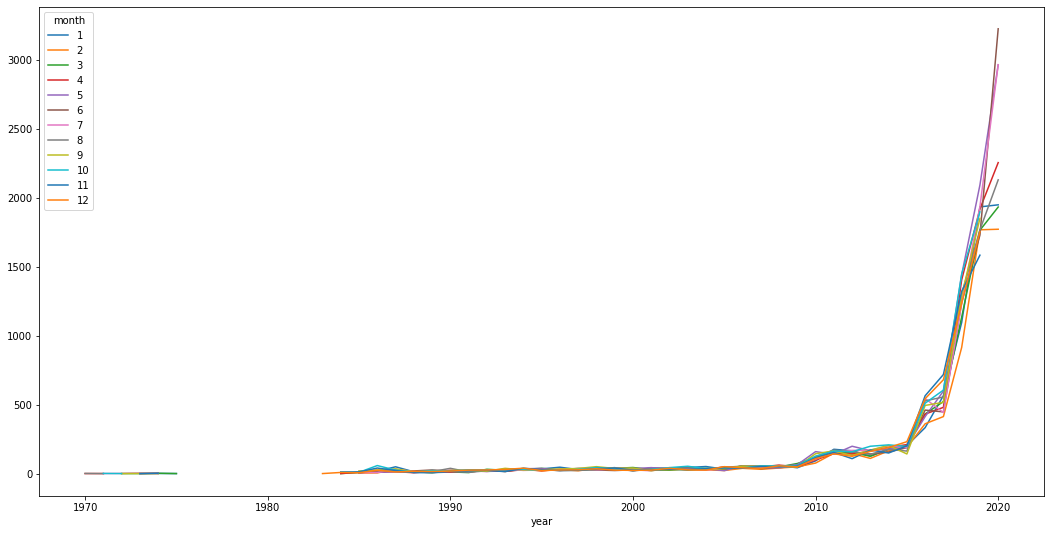

In [14]:
df_ma_pivot = df_obitos_ma.pivot_table(values='deaths', index=['year'], columns='month', aggfunc='sum')
df_ma_pivot.plot(figsize=(18,9))#.reset_index()

In [16]:
print(df_ma_pivot.index)
print(df_ma_pivot.columns)
df_ma_pivot.head()

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='year')
Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1970,1.0,1.0,NaN,1.0,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN
1971,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,2.0,NaN,NaN
1972,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,1.0
1973,NaN,NaN,1.0,NaN,1.0,1.0,5.0,1.0,2.0,NaN,1.0,NaN
1974,2.0,NaN,3.0,1.0,5.0,2.0,1.0,NaN,1.0,NaN,3.0,2.0


In [17]:
df_agrupado  = df_obitos_ma.pivot_table(values='deaths', index=['year','month'], aggfunc='sum')

In [18]:
df_obitos_ma.head()

,year,month,state,deaths,year_month
0,1970,1,MA,1,1970/1
1,1970,2,MA,1,1970/2
2,1970,4,MA,1,1970/4
3,1970,5,MA,1,1970/5
4,1970,8,MA,2,1970/8


Mortes nos ultimos 5 anos. Seria interessante pegar o valor acumulado no periodo.

In [42]:
df = df_obitos_ma.query('year >= 2016')
max = df['deaths'].max() + 50

fig = px.histogram(df, x='year_month', y='deaths',color='year', title='Obitos no Maranhão',histfunc='sum')
fig.update_xaxes(nticks=12)
fig.update_layout(yaxis=dict(range=[0,max]))
fig.show()

In [49]:
df = df_obitos_ma.query('year >= 2016')
max = df['deaths'].max() + 50

fig = px.line(df, x='year_month', y='deaths',color='year', title='Obitos no Maranhão')
fig.update_xaxes(nticks=12)
fig.update_layout(yaxis=dict(range=[0,max]))
fig.show()

In [52]:
df = df_obitos_ma.query('year >= 2016')
max = df['deaths'].max() + 50

fig = px.line(df, x='year_month', y='deaths', title='Obitos no Maranhão')
fig.update_xaxes(nticks=12)
fig.update_layout(yaxis=dict(range=[0,max]))
fig.show()

In [55]:
df_obitos['year_month'] = list(map(lambda x,y: str(x)+"/"+str(y),df_obitos['year'],df_obitos['month'].astype(str).str.rjust(2, '0') ))
df = df_obitos.query('year >= 2016')
max = df['deaths'].max() + 50
#print(max)

fig = px.histogram(df, x='year_month', y='deaths',color='year', title='Obitos no Maranhão',histfunc='sum')
fig.update_xaxes(nticks=12)
fig.update_layout(yaxis=dict(range=[0,max]))
fig.show()

In [20]:
df = df_ma_pivot.reset_index()
fig = px.line(df, x="year", y=1, title='Obitos no Maranhão')
fig.show()

In [21]:
max = df_obitos_ma.query('year == 2017')['deaths'].max() + 50

In [22]:
dados = df_obitos_ma#.query('year == 2017')
fig = px.line(dados, x="month", y="deaths", title='Obitos no Maranhão',color='year')#,line_group='year')
fig.update_xaxes(nticks=12)
#fig.update_yaxes(nticks=8)
fig.update_layout(yaxis=dict(range=[0,max]))
fig.show()

In [23]:
df_obitos_ma_2017 = df_obitos_ma[df_obitos_ma['year']>=2012]

In [24]:
df_obitos_ma_2017.head()

,year,month,state,deaths,year_month
380,2012,1,MA,166,2012/1
381,2012,2,MA,146,2012/2
382,2012,3,MA,153,2012/3
383,2012,4,MA,143,2012/4
384,2012,5,MA,199,2012/5


Text(0.5, 1.0, 'Obitos MA')

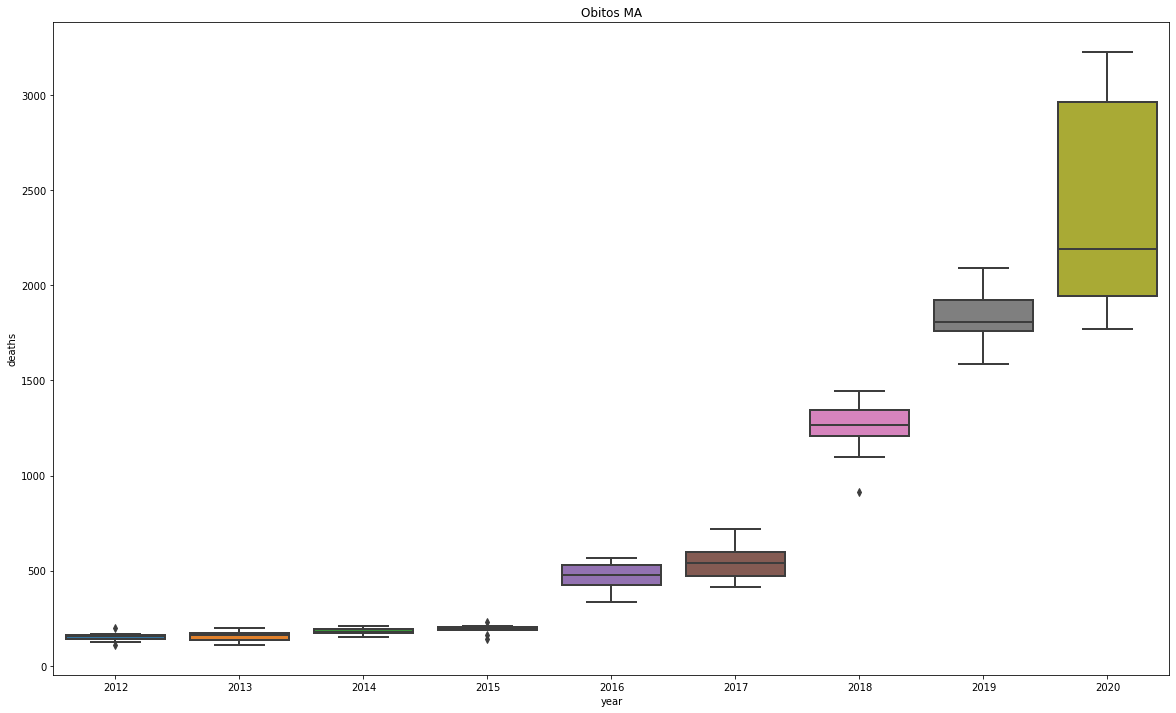

In [27]:
plt.figure(figsize=(20,12))
sns.boxplot(x='year',y='deaths', data = df_obitos_ma_2017,linewidth=2)
plt.title("Obitos MA")

# Covid-19

Fonte: https://brasil.io/dataset/covid19/caso/

In [58]:
path_covid = '/content/drive/My Drive/Alura/caso.csv'

In [59]:
df_covid = pd.read_csv(path_covid,engine='python', encoding='utf-8',sep=',', index_col=False)

In [60]:
df_covid.dtypes

date                               object
state                              object
city                               object
place_type                         object
confirmed                           int64
deaths                              int64
order_for_place                     int64
is_last                              bool
estimated_population_2019         float64
estimated_population              float64
city_ibge_code                    float64
confirmed_per_100k_inhabitants    float64
death_rate                        float64
dtype: object

In [63]:
df_covid.query('state == "MA" and date > "2020-10"')

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
174541,2020-11-05,MA,NaN,state,186904,4101,231,True,"7,075,181.00","7,114,598.00",21.00,"2,627.05",0.02
174542,2020-11-04,MA,NaN,state,186572,4091,230,False,"7,075,181.00","7,114,598.00",21.00,"2,622.38",0.02
174543,2020-11-03,MA,NaN,state,186209,4081,229,False,"7,075,181.00","7,114,598.00",21.00,"2,617.28",0.02
174544,2020-11-02,MA,NaN,state,185986,4070,228,False,"7,075,181.00","7,114,598.00",21.00,"2,614.15",0.02
174545,2020-11-01,MA,NaN,state,185917,4061,227,False,"7,075,181.00","7,114,598.00",21.00,"2,613.18",0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215451,2020-10-05,MA,Água Doce do Maranhão,city,651,5,152,False,"12,571.00","12,652.00","2,100,154.00","5,145.43",0.01
215452,2020-10-04,MA,Água Doce do Maranhão,city,651,5,151,False,"12,571.00","12,652.00","2,100,154.00","5,145.43",0.01
215453,2020-10-03,MA,Água Doce do Maranhão,city,651,5,150,False,"12,571.00","12,652.00","2,100,154.00","5,145.43",0.01
215454,2020-10-02,MA,Água Doce do Maranhão,city,651,5,149,False,"12,571.00","12,652.00","2,100,154.00","5,145.43",0.01


In [ ]:
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
df_state_last = df_covid[(df_covid['city'].isna()) & (df_covid['is_last'] == True)] #(df_covid['state'] == 'MA') & 
print(df_state_last.shape)
#df_state_last.set_index('state', inplace=True)
df_state_last

In [ ]:
df_state_last.dtypes

In [86]:
df_covid.query('state == "SP" and date > "2020-10"')[df_covid['city'].isna()].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
821973,2020-11-05,SP,NaN,state,1125936,39717,253,True,"45,919,049.00","46,289,333.00",35.00,"2,432.39",0.04
821974,2020-11-04,SP,NaN,state,1123299,39549,252,False,"45,919,049.00","46,289,333.00",35.00,"2,426.69",0.04
821975,2020-11-03,SP,NaN,state,1118544,39364,251,False,"45,919,049.00","46,289,333.00",35.00,"2,416.42",0.04
821976,2020-11-02,SP,NaN,state,1117795,39346,250,False,"45,919,049.00","46,289,333.00",35.00,"2,414.80",0.04
821977,2020-11-01,SP,NaN,state,1117147,39331,249,False,"45,919,049.00","46,289,333.00",35.00,"2,413.40",0.04


In [101]:
#df_obitos['year_month'] = list(map(lambda x,y: str(x)+"/"+str(y),df_obitos['year'],df_obitos['month'].astype(str).str.rjust(2, '0') ))
df = df_covid.query('state == "SP"')[df_covid['city'].isna()]
max = df['confirmed'].max() + 50
#print(max)

fig = px.line(df, x='date', y='confirmed', title='Casos confirmados no estado de SP')#,hover_data={'date': "|%B %d, %Y"})

fig.add_scatter(x=df['date'], y=df['deaths'], mode='lines')

fig.update_xaxes(nticks=12)
fig.update_layout(yaxis=dict(range=[0,max]))
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

